In [45]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import missingno as msno
import pandas_profiling
import sklearn
import scipy

sns.set_context("poster", font_scale=1.3)
import folium
import ipywidgets as widgets

% matplotlib inline
% config InlineBackend.figure_format='retina'


In [6]:
mpl_update = {'font.size': 16,
              'xtick.labelsize': 14,
              'ytick.labelsize': 14,
              'figure.figsize': [12.0, 8.0],
              'axes.color_cycle': ['#0055A7', '#2C3E4F', '#26C5ED', '#00cc66', '#D34100', '#FF9700', '#091D32'],
              'axes.labelsize': 16,
              'axes.labelcolor': '#677385',
              'axes.titlesize': 20,
              'lines.color': '#0055A7',
              'lines.linewidth': 3,
              'text.color': '#677385'}
mpl.rcParams.update(mpl_update)


D:\Coding\Anaconda3\envs\idata\lib\site-packages\matplotlib\__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [15]:
def time_slice(df, time_period):
    # Only take data for time period of interest
    df = df[df.time_period == time_period]

    # Pivot table 
    df = df.pivot(index='country', columns='variable', values='value')

    df.columns.name = time_period

    return df

def country_slice(df, country):
    # Only take data for country of interest
    df = df[df.country == country]

    # Pivot table 
    df = df.pivot(index='variable', columns='time_period', values='value')

    df.index.name = country
    return df

def variable_slice(df, variable):
    # Only data for that variable
    df = df[df.variable == variable]

    # Get variable for each country over the time periods 
    df = df.pivot(index='country', columns='time_period', values='value')
    return df


def time_series(df, country, variable):
    # Only take data for country/variable combo 
    series = df[(df.country == country) & (df.variable == variable)]

    # Drop years with no data 
    series = series.dropna()[['year_measured', 'value']]

    # Change years to int and set as index 
    series.year_measured = series.year_measured.astype(int)
    series.set_index('year_measured', inplace=True)
    series.columns = [variable]
    return series

def subregion(data, region):
    return data[data.region == region]

simple_regions = {
    'World | Asia': 'Asia',
    'Americas | Central America and Caribbean | Central America': 'North America',
    'Americas | Central America and Caribbean | Greater Antilles': 'North America',
    'Americas | Central America and Caribbean | Lesser Antilles and Bahamas': 'North America',
    'Americas | Northern America | Northern America': 'North America',
    'Americas | Northern America | Mexico': 'North America',
    'Americas | Southern America | Guyana': 'South America',
    'Americas | Southern America | Andean': 'South America',
    'Americas | Southern America | Brazil': 'South America',
    'Americas | Southern America | Southern America': 'South America',
    'World | Africa': 'Africa',
    'World | Europe': 'Europe',
    'World | Oceania': 'Oceania'
}


In [18]:
data = pd.read_csv("E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\Aquastat\data\\aquastat.csv.gzip"
                   , compression="gzip")

# 数据处理
data.region = data.region.apply(lambda x: simple_regions[x])
data = data.loc[~data.variable.str.contains('exploitable'), :]
data = data.loc[~(data.variable == 'national_rainfall_index')]
data[:5]


,country,region,variable,variable_full,time_period,year_measured,value
0,Afghanistan,Asia,total_area,Total area of the country (1000 ha),1958-1962,1962.0,65286.0
1,Afghanistan,Asia,total_area,Total area of the country (1000 ha),1963-1967,1967.0,65286.0
2,Afghanistan,Asia,total_area,Total area of the country (1000 ha),1968-1972,1972.0,65286.0
3,Afghanistan,Asia,total_area,Total area of the country (1000 ha),1973-1977,1977.0,65286.0
4,Afghanistan,Asia,total_area,Total area of the country (1000 ha),1978-1982,1982.0,65286.0


In [20]:
recent = time_slice(data, '2013-2017')
recent[:5]


2013-2017,accounted_flow,accounted_flow_border_rivers,agg_to_gdp,arable_land,avg_annual_rain_depth,avg_annual_rain_vol,cultivated_area,dam_capacity_per_capita,dependency_ratio,flood_occurence,...,total_flow_border_rivers,total_pop,total_pop_access_drinking,total_renewable,total_renewable_groundwater,total_renewable_per_capita,total_renewable_surface,urban_pop,urban_pop_access_drinking,water_total_external_renewable
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,19.00,9.0,22.6000,7771.0,327.0,213.5000,7910.0,61.76,28.7200,3.7,...,33.4,32527.00,55.3,65.3300,10.650,2008.0,55.68,8547.0,78.2,18.18
Albania,3.30,0.0,22.0500,615.6,1485.0,42.6900,696.0,1391.00,10.9300,2.7,...,0.0,2897.00,95.1,30.2000,6.200,10425.0,26.35,1835.0,94.9,3.30
Algeria,0.39,0.0,13.0500,7469.0,89.0,212.0000,8439.0,209.30,3.5990,2.8,...,0.0,39667.00,83.6,11.6700,1.517,294.2,10.15,28739.0,84.3,0.42
Andorra,NaN,NaN,0.5239,2.8,NaN,0.4724,2.8,NaN,NaN,3.3,...,NaN,70.47,100.0,0.3156,NaN,4479.0,NaN,68.9,100.0,NaN
Angola,0.40,0.0,NaN,4900.0,1010.0,1259.0000,5190.0,377.50,0.2695,1.7,...,0.0,25022.00,49.0,148.4000,58.000,5931.0,145.40,10052.0,75.4,0.40


In [21]:
recent[['total_pop', 'urban_pop', 'rural_pop']].describe().astype(int)


2013-2017,total_pop,urban_pop,rural_pop
count,199,199,199
mean,36890,19849,17040
std,140720,69681,77461
min,0,0,-98
25%,1368,822,500
50%,7595,3967,2404
75%,25088,11656,10677
max,1407306,805387,891112


In [22]:
recent.sort_values('rural_pop')[['total_pop', 'urban_pop', 'rural_pop']].head()


2013-2017,total_pop,urban_pop,rural_pop
country,,,
Qatar,2235.00,2333.00,-98.00
Singapore,5604.00,5619.00,-15.00
Monaco,37.73,38.32,-0.59
Holy See,0.80,0.80,0.00
Nauru,10.22,10.12,0.10


In [23]:
time_series(data, 'Qatar', 'total_pop').join(time_series(data, 'Qatar', 'urban_pop')).join(
    time_series(data, 'Qatar', 'rural_pop'))


,total_pop,urban_pop,rural_pop
year_measured,,,
1962,56.19,48.39,7.80
1967,86.16,75.48,10.68
1972,130.40,115.60,14.80
1977,182.40,162.40,20.00
1982,277.20,248.60,28.60
1987,423.30,385.40,37.90
1992,489.70,459.10,30.60
1997,528.20,506.50,21.70
2002,634.40,608.90,25.50


In [24]:
recent[['total_pop', 'urban_pop', 'rural_pop']].describe().astype(int)


2013-2017,total_pop,urban_pop,rural_pop
count,199,199,199
mean,36890,19849,17040
std,140720,69681,77461
min,0,0,-98
25%,1368,822,500
50%,7595,3967,2404
75%,25088,11656,10677
max,1407306,805387,891112


In [25]:
# 计算偏度
recent[['total_pop', 'urban_pop', 'rural_pop']].apply(scipy.stats.skew)

# 正态分布的偏度应为零。负偏度表示偏左，正偏表示右偏


2013-2017
total_pop    8.519379
urban_pop    8.545690
rural_pop    9.490029
dtype: float64

In [26]:
# 计算峰度
recent[['total_pop', 'urban_pop', 'rural_pop']].apply(scipy.stats.kurtosis)


2013-2017
total_pop    76.923725
urban_pop    85.499659
rural_pop    95.838930
dtype: float64

Text(0.5,1,'Distribution of population of countries 2013-2017')

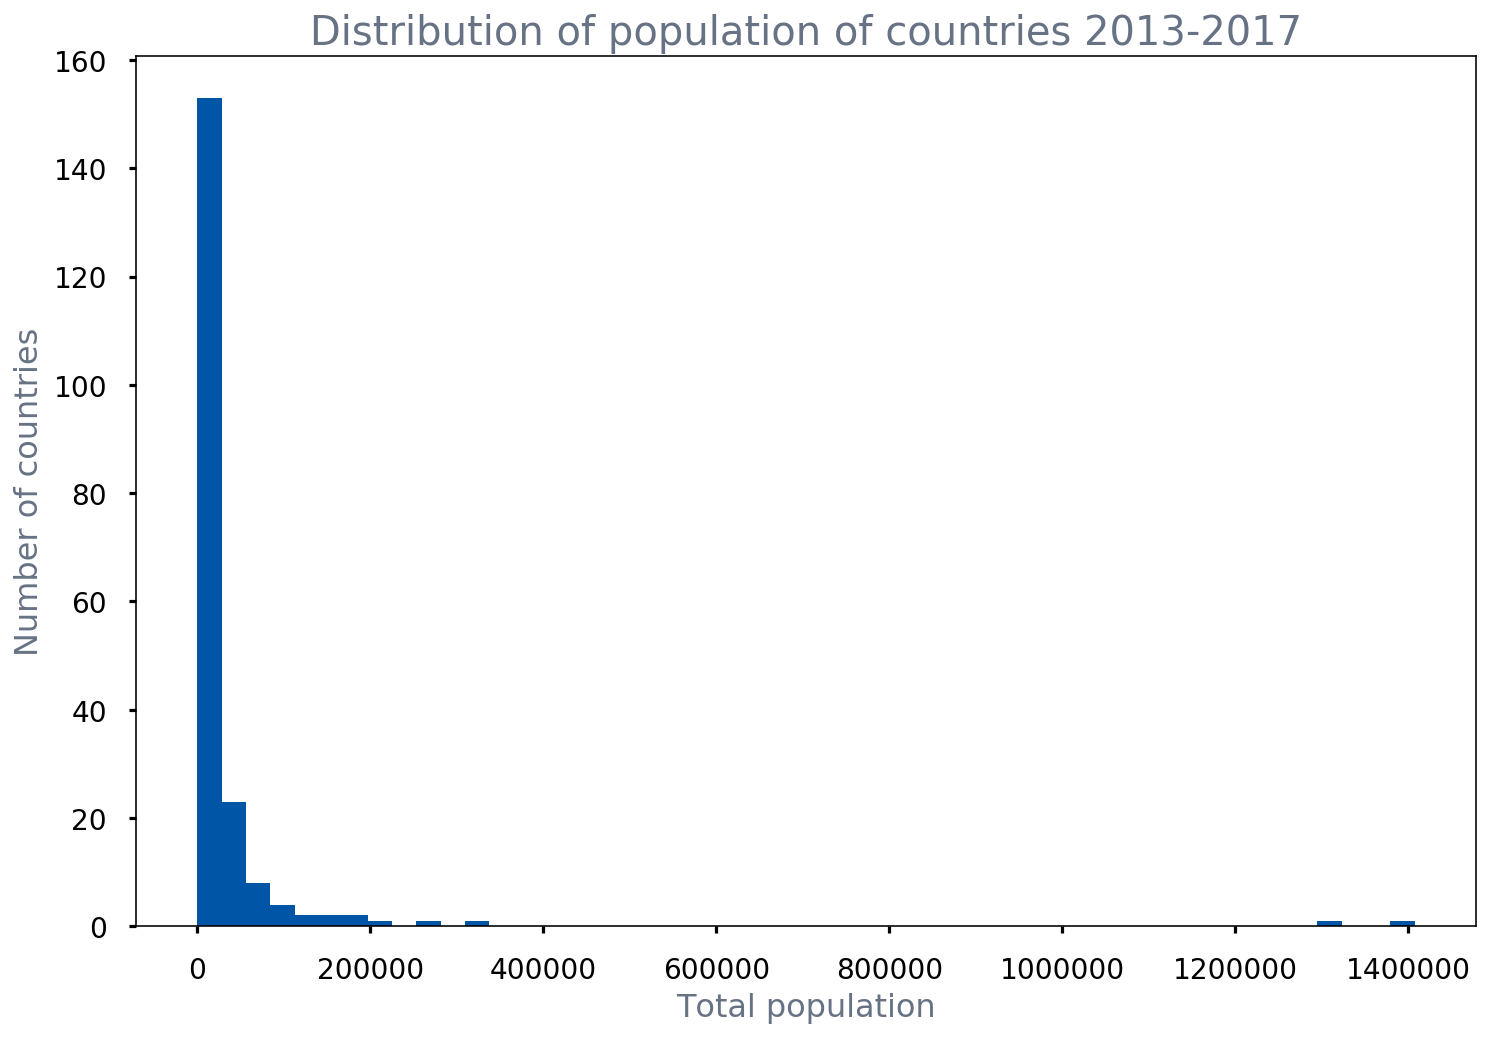

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(recent.total_pop.values, bins=50)
ax.set_xlabel('Total population')
ax.set_ylabel('Number of countries')
ax.set_title('Distribution of population of countries 2013-2017')


In [28]:
recent[['total_pop']].apply(np.log).apply(scipy.stats.skew)
# recent[['total_pop']].apply(np.log).apply(scipy.stats.skewtest)

# log转换，较少偏度


2013-2017
total_pop   -0.899063
dtype: float64

In [29]:
recent[['total_pop']].apply(np.log).apply(scipy.stats.kurtosis)
# recent[['total_pop']].apply(np.log).apply(scipy.stats.kurtosistest)

# 较少峰度


2013-2017
total_pop    1.086877
dtype: float64

In [30]:
def plot_hist(df, variable, bins=20, xlabel=None, by=None,
              ylabel=None, title=None, logx=False, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(12, 8))
    if logx:
        if df[variable].min() <= 0:
            df[variable] = df[variable] - df[variable].min() + 1
            print('Warning: data <=0 exists, data transformed by %0.2g before plotting' % (- df[variable].min() + 1))

        bins = np.logspace(np.log10(df[variable].min()),
                           np.log10(df[variable].max()), bins)
        ax.set_xscale("log")

    ax.hist(df[variable].dropna().values, bins=bins);

    if xlabel:
        ax.set_xlabel(xlabel);
    if ylabel:
        ax.set_ylabel(ylabel);
    if title:
        ax.set_title(title);

    return ax


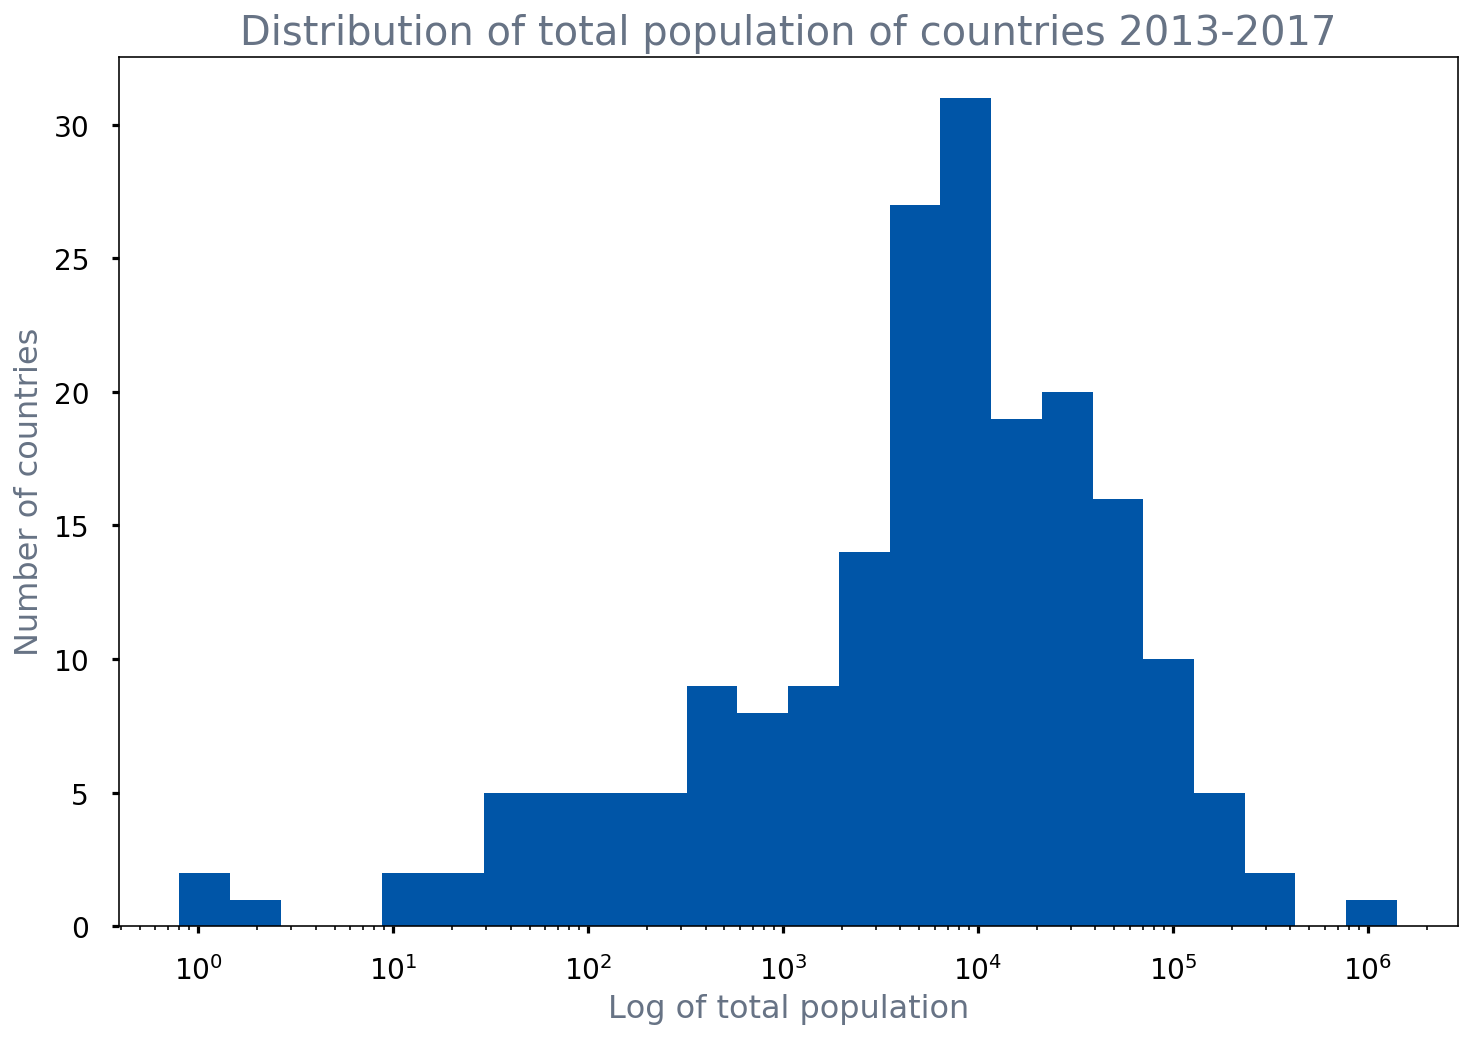

In [31]:
plot_hist(recent, 'total_pop', bins=25, logx=True,
          xlabel='Log of total population', ylabel='Number of countries',
          title='Distribution of total population of countries 2013-2017')


In [32]:
recent['population_density'] = recent.total_pop.divide(recent.total_area)


Text(0.5,1,'United States population over time')

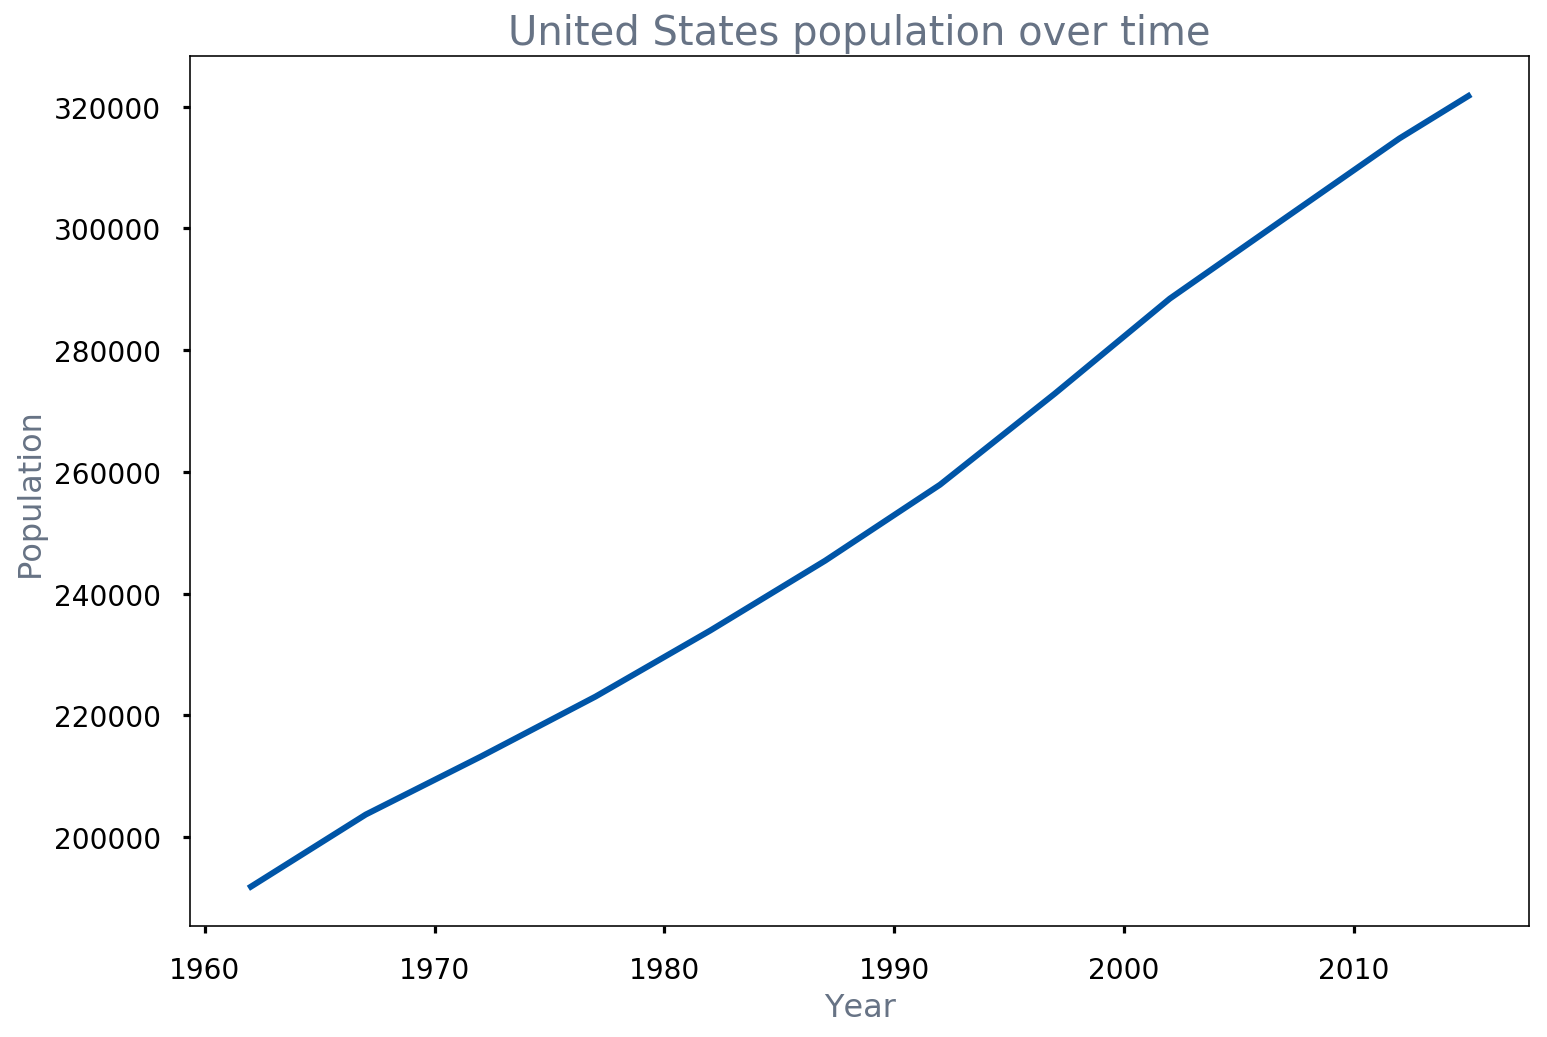

In [33]:
plt.plot(time_series(data, 'United States of America', 'total_pop'))
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('United States population over time')


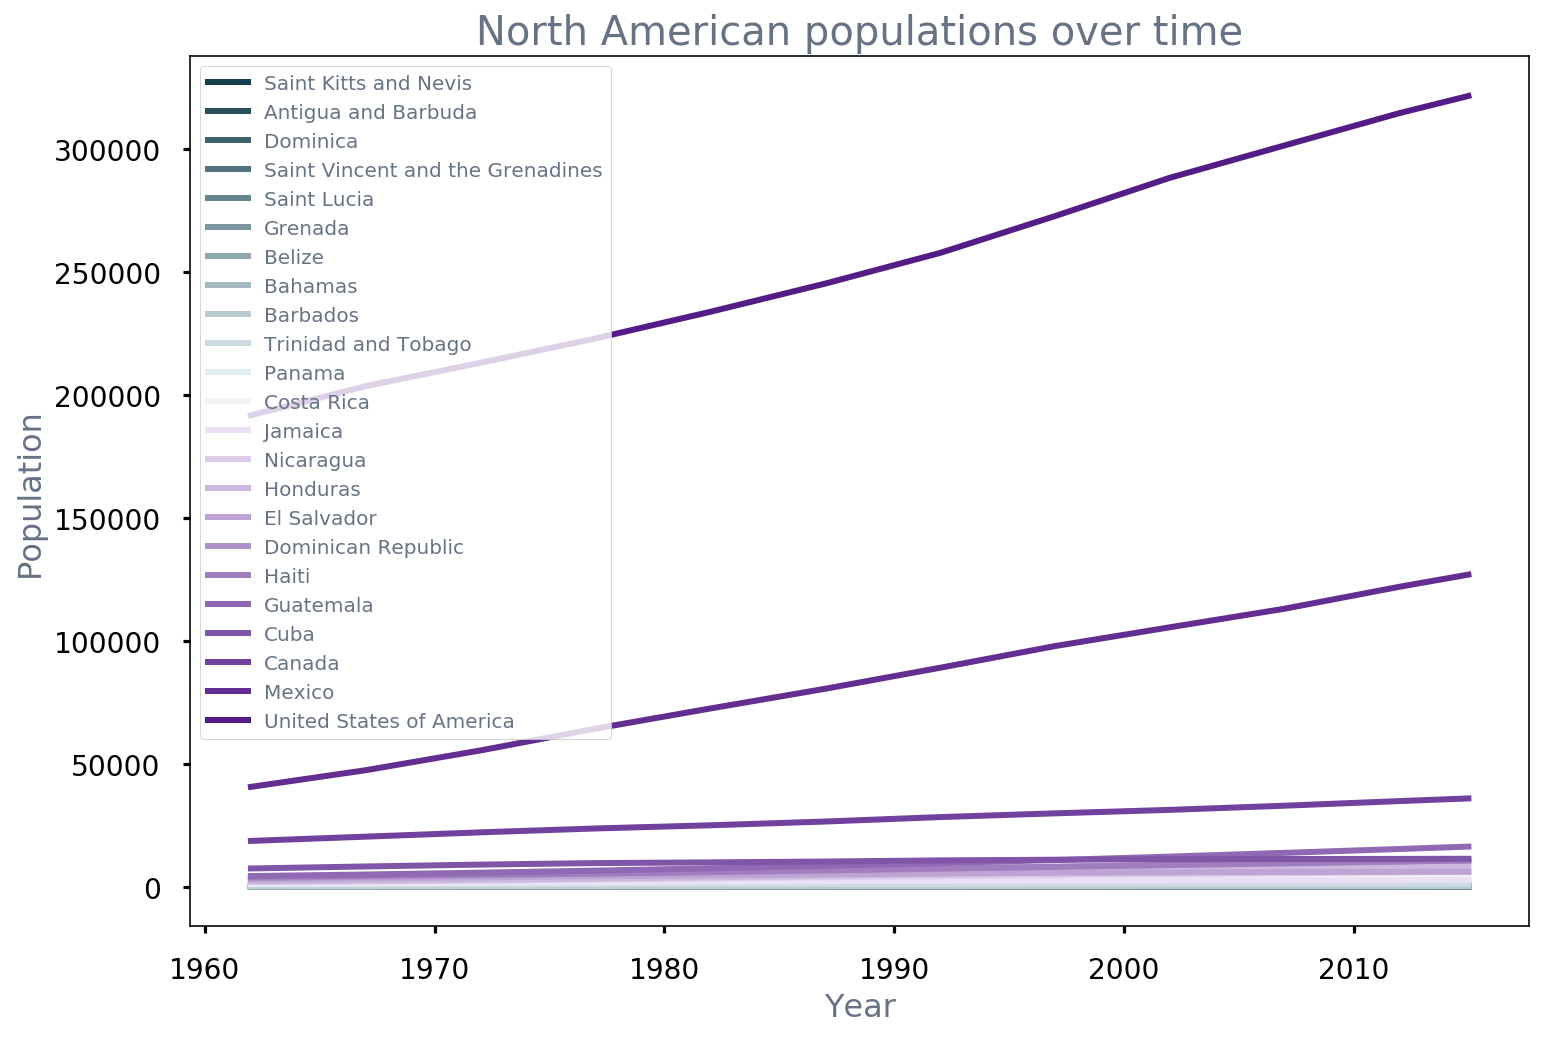

In [34]:
with sns.color_palette(sns.diverging_palette(220, 280, s=85, l=25, n=23)):
    north_america = time_slice(subregion(data, 'North America'), '1958-1962').sort_values('total_pop').index.tolist()
    for country in north_america:
        plt.plot(time_series(data, country, 'total_pop'), label=country)
        plt.xlabel('Year')
        plt.ylabel('Population')
        plt.title('North American populations over time')
    plt.legend(loc=2, prop={'size': 10})


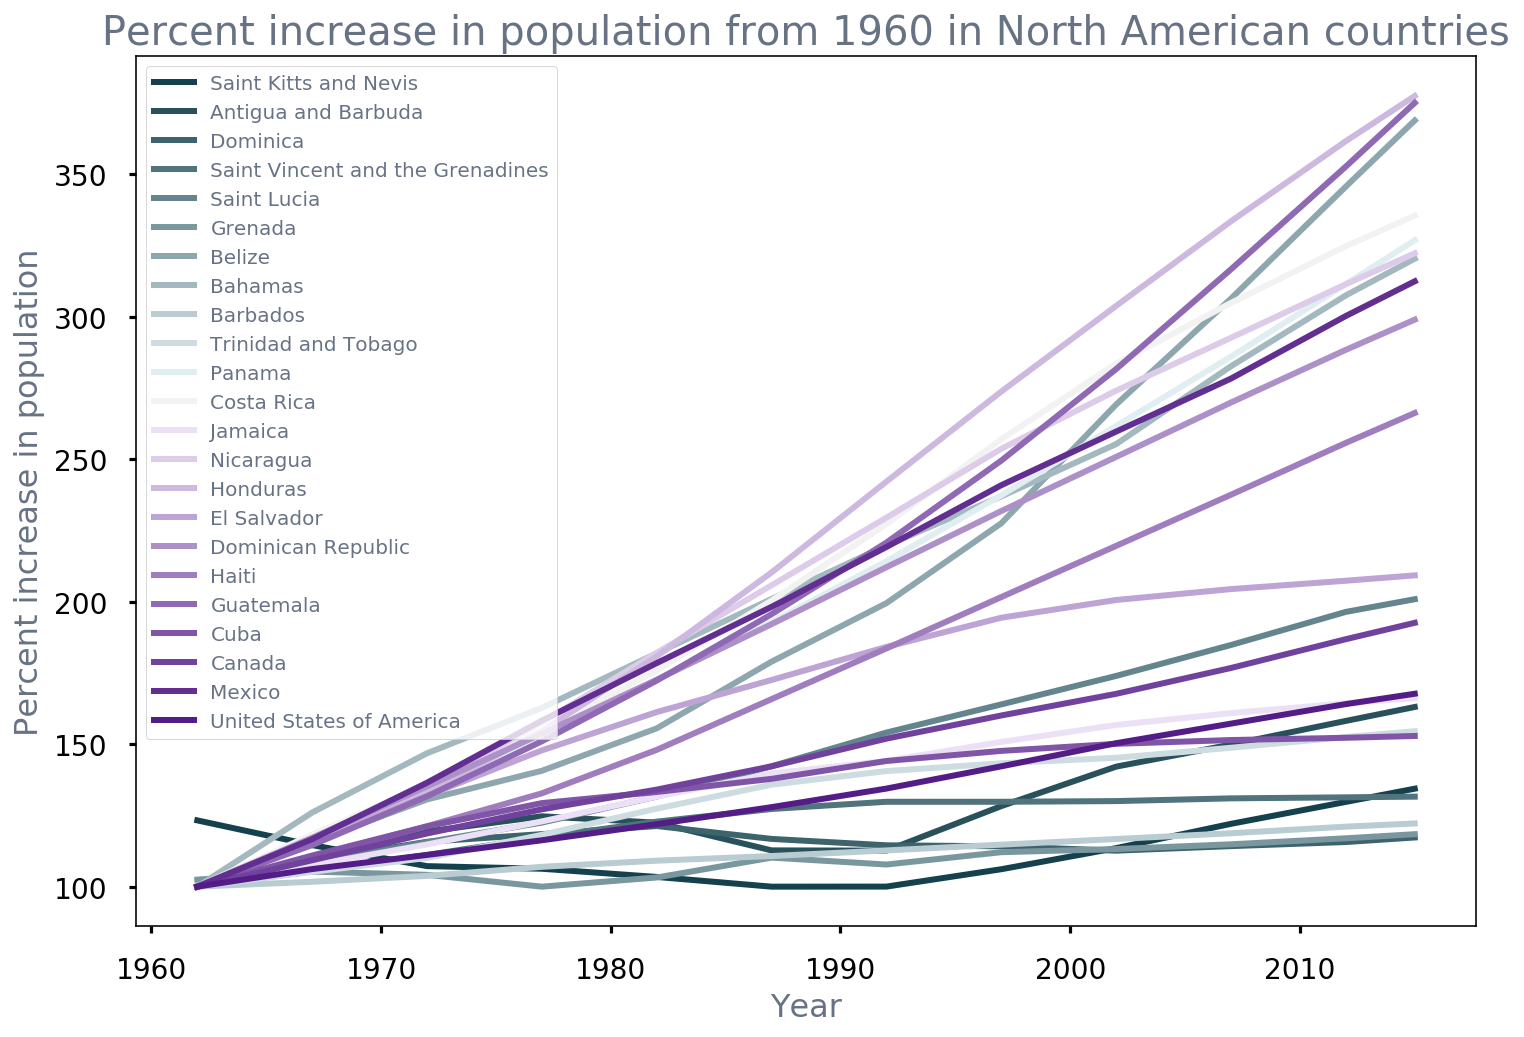

In [35]:
with sns.color_palette(sns.diverging_palette(220, 280, s=85, l=25, n=23)):
    for country in north_america:
        ts = time_series(data, country, 'total_pop')
        ts['norm_pop'] = ts.total_pop / ts.total_pop.min() * 100
        plt.plot(ts['norm_pop'], label=country);
        plt.xlabel('Year');
        plt.ylabel('Percent increase in population');
        plt.title('Percent increase in population from 1960 in North American countries');
    plt.legend(loc=2, prop={'size': 10});


In [36]:
north_america_pop = variable_slice(subregion(data, 'North America'), 'total_pop')
north_america_norm_pop = north_america_pop.div(north_america_pop.min(axis=1), axis=0) * 100
north_america_norm_pop = north_america_norm_pop.loc[north_america]


Text(0.5,1,'Percent increase in population from 1960')

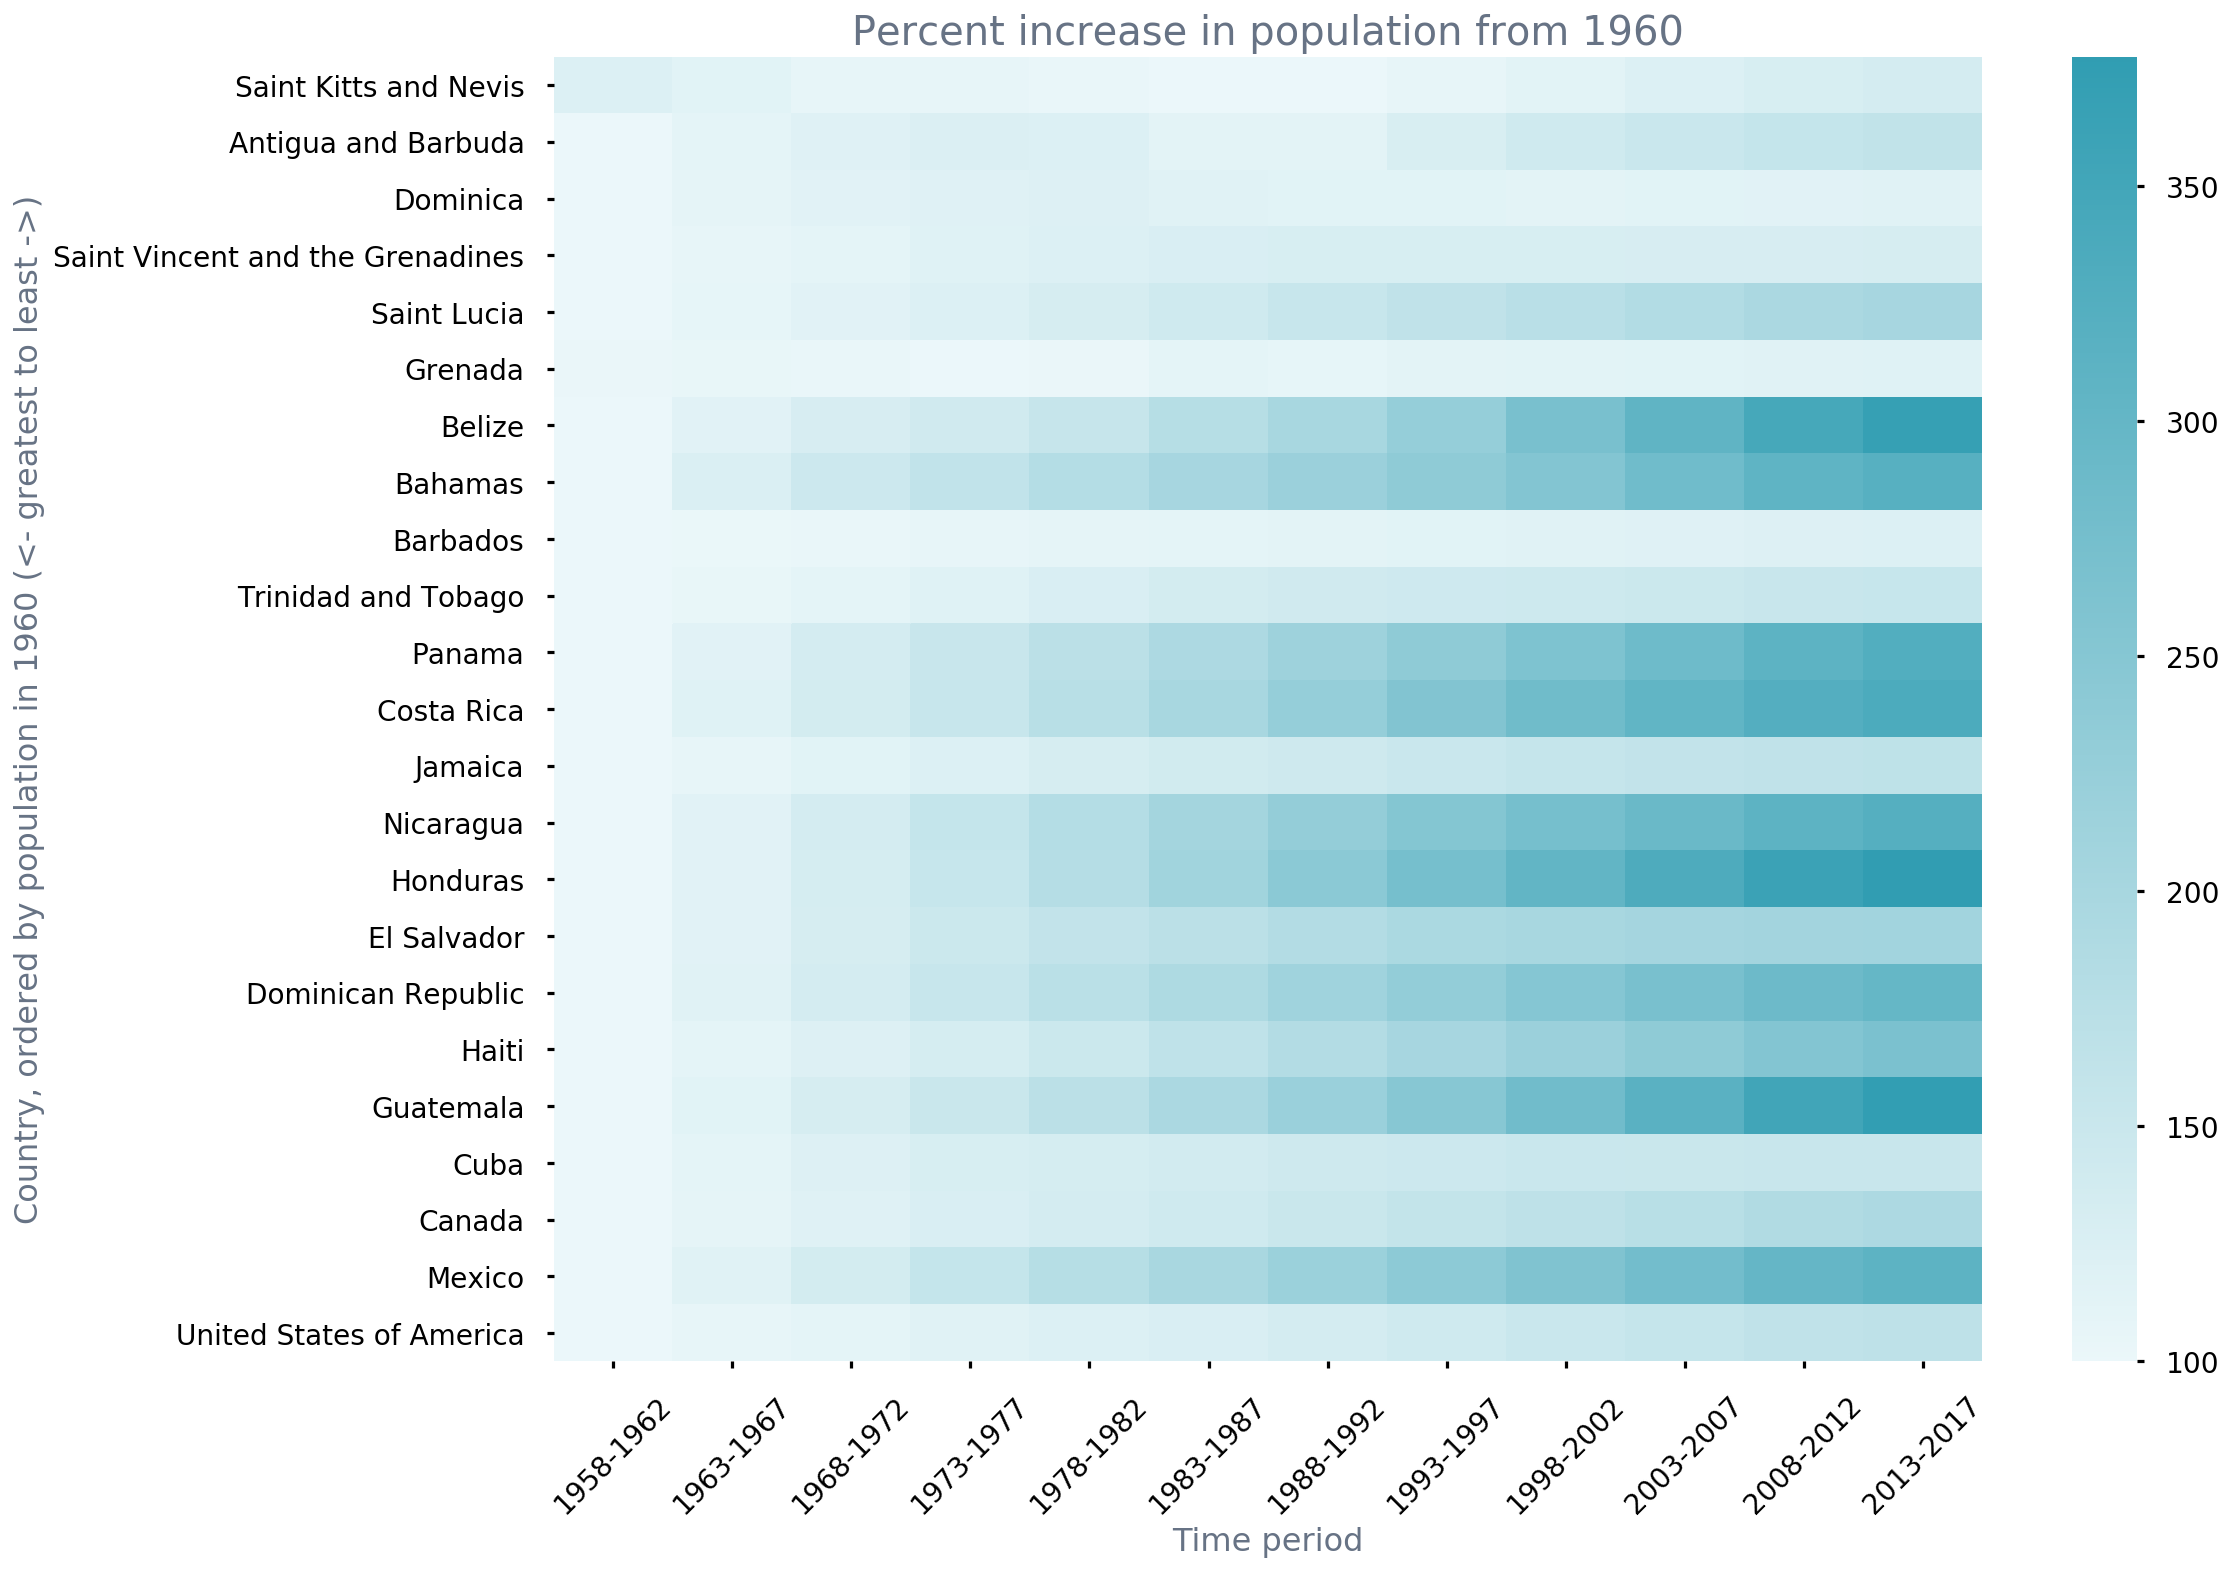

In [37]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(north_america_norm_pop, ax=ax, cmap=sns.light_palette((214, 90, 60), input="husl", as_cmap=True))
plt.xticks(rotation=45)
plt.xlabel('Time period')
plt.ylabel('Country, ordered by population in 1960 (<- greatest to least ->)')
plt.title('Percent increase in population from 1960')


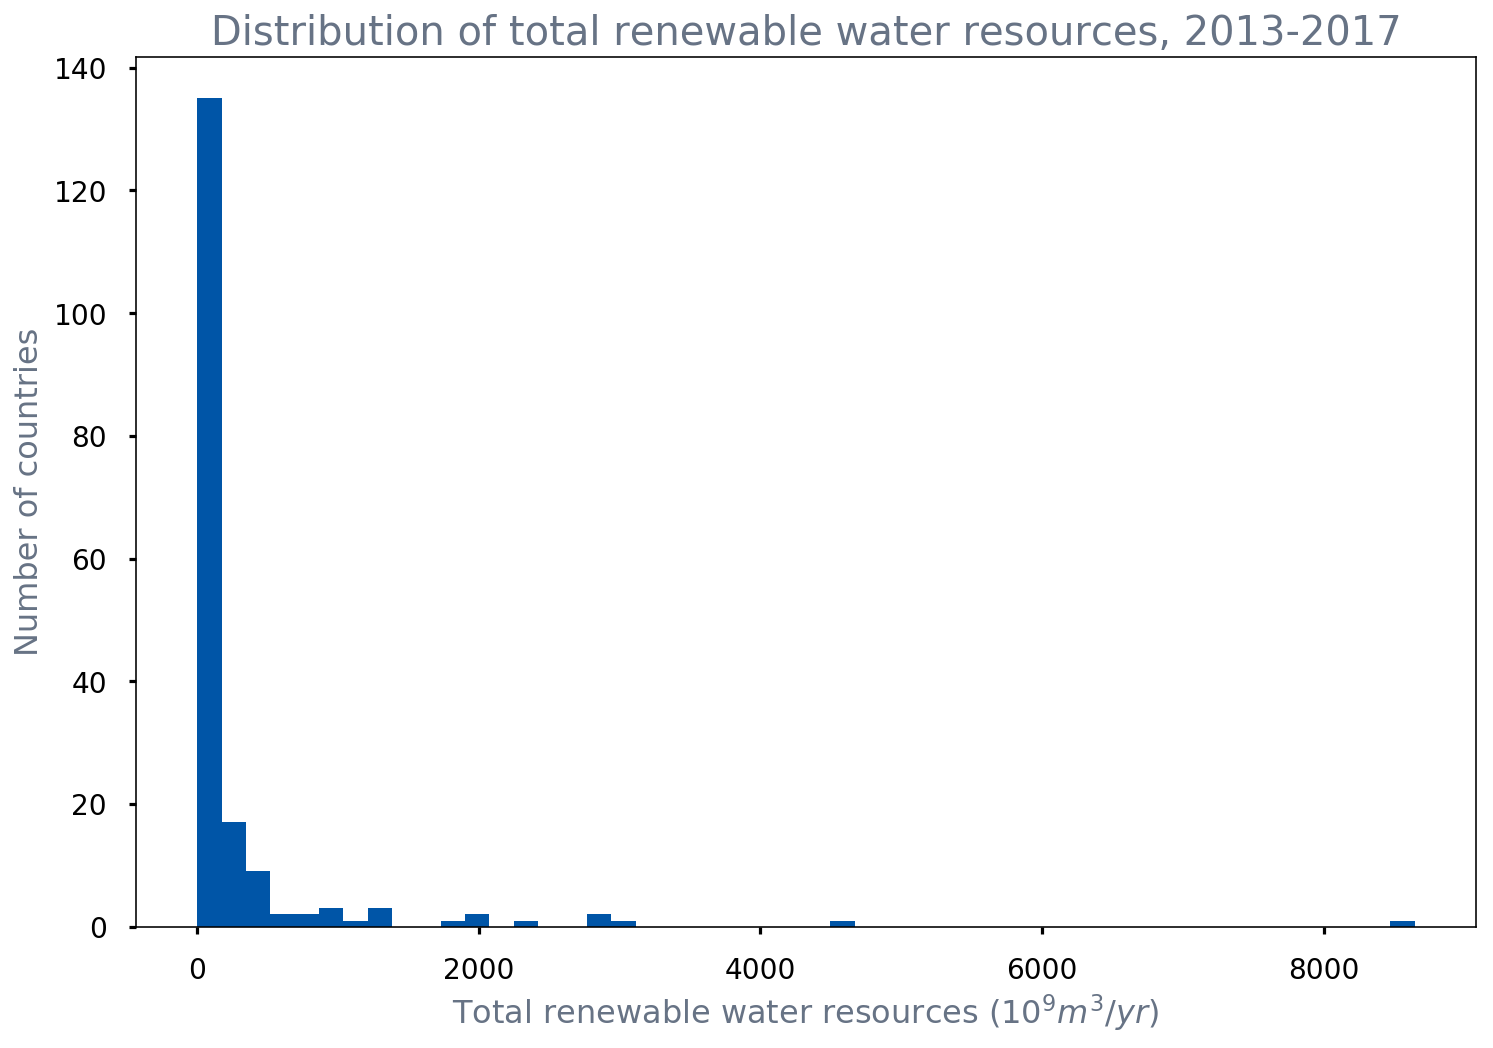

In [38]:
plot_hist(recent, 'total_renewable', bins=50,
          xlabel='Total renewable water resources ($10^9 m^3/yr$)',
          ylabel='Number of countries',
          title='Distribution of total renewable water resources, 2013-2017')


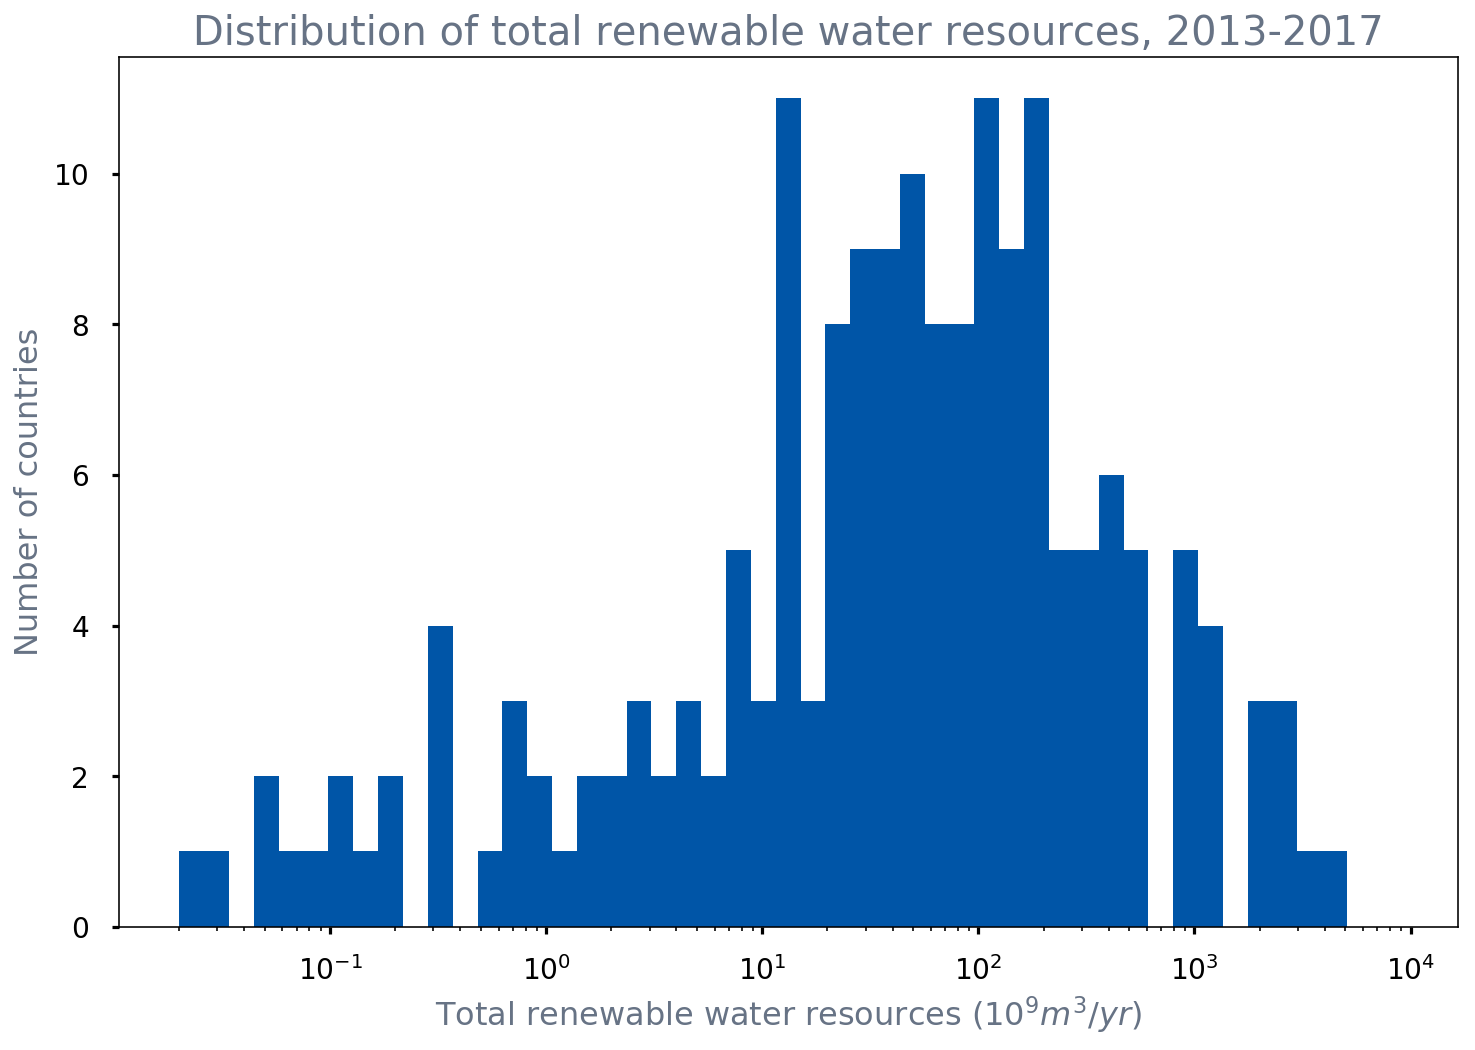

In [39]:
plot_hist(recent, 'total_renewable', bins=50,
          xlabel='Total renewable water resources ($10^9 m^3/yr$)',
          ylabel='Number of countries', logx=True,
          title='Distribution of total renewable water resources, 2013-2017')


In [40]:
north_america_renew = variable_slice(subregion(data, 'North America'), 'total_renewable')


Text(0.5,1,'Total renewable water resources increase in population from 1960')

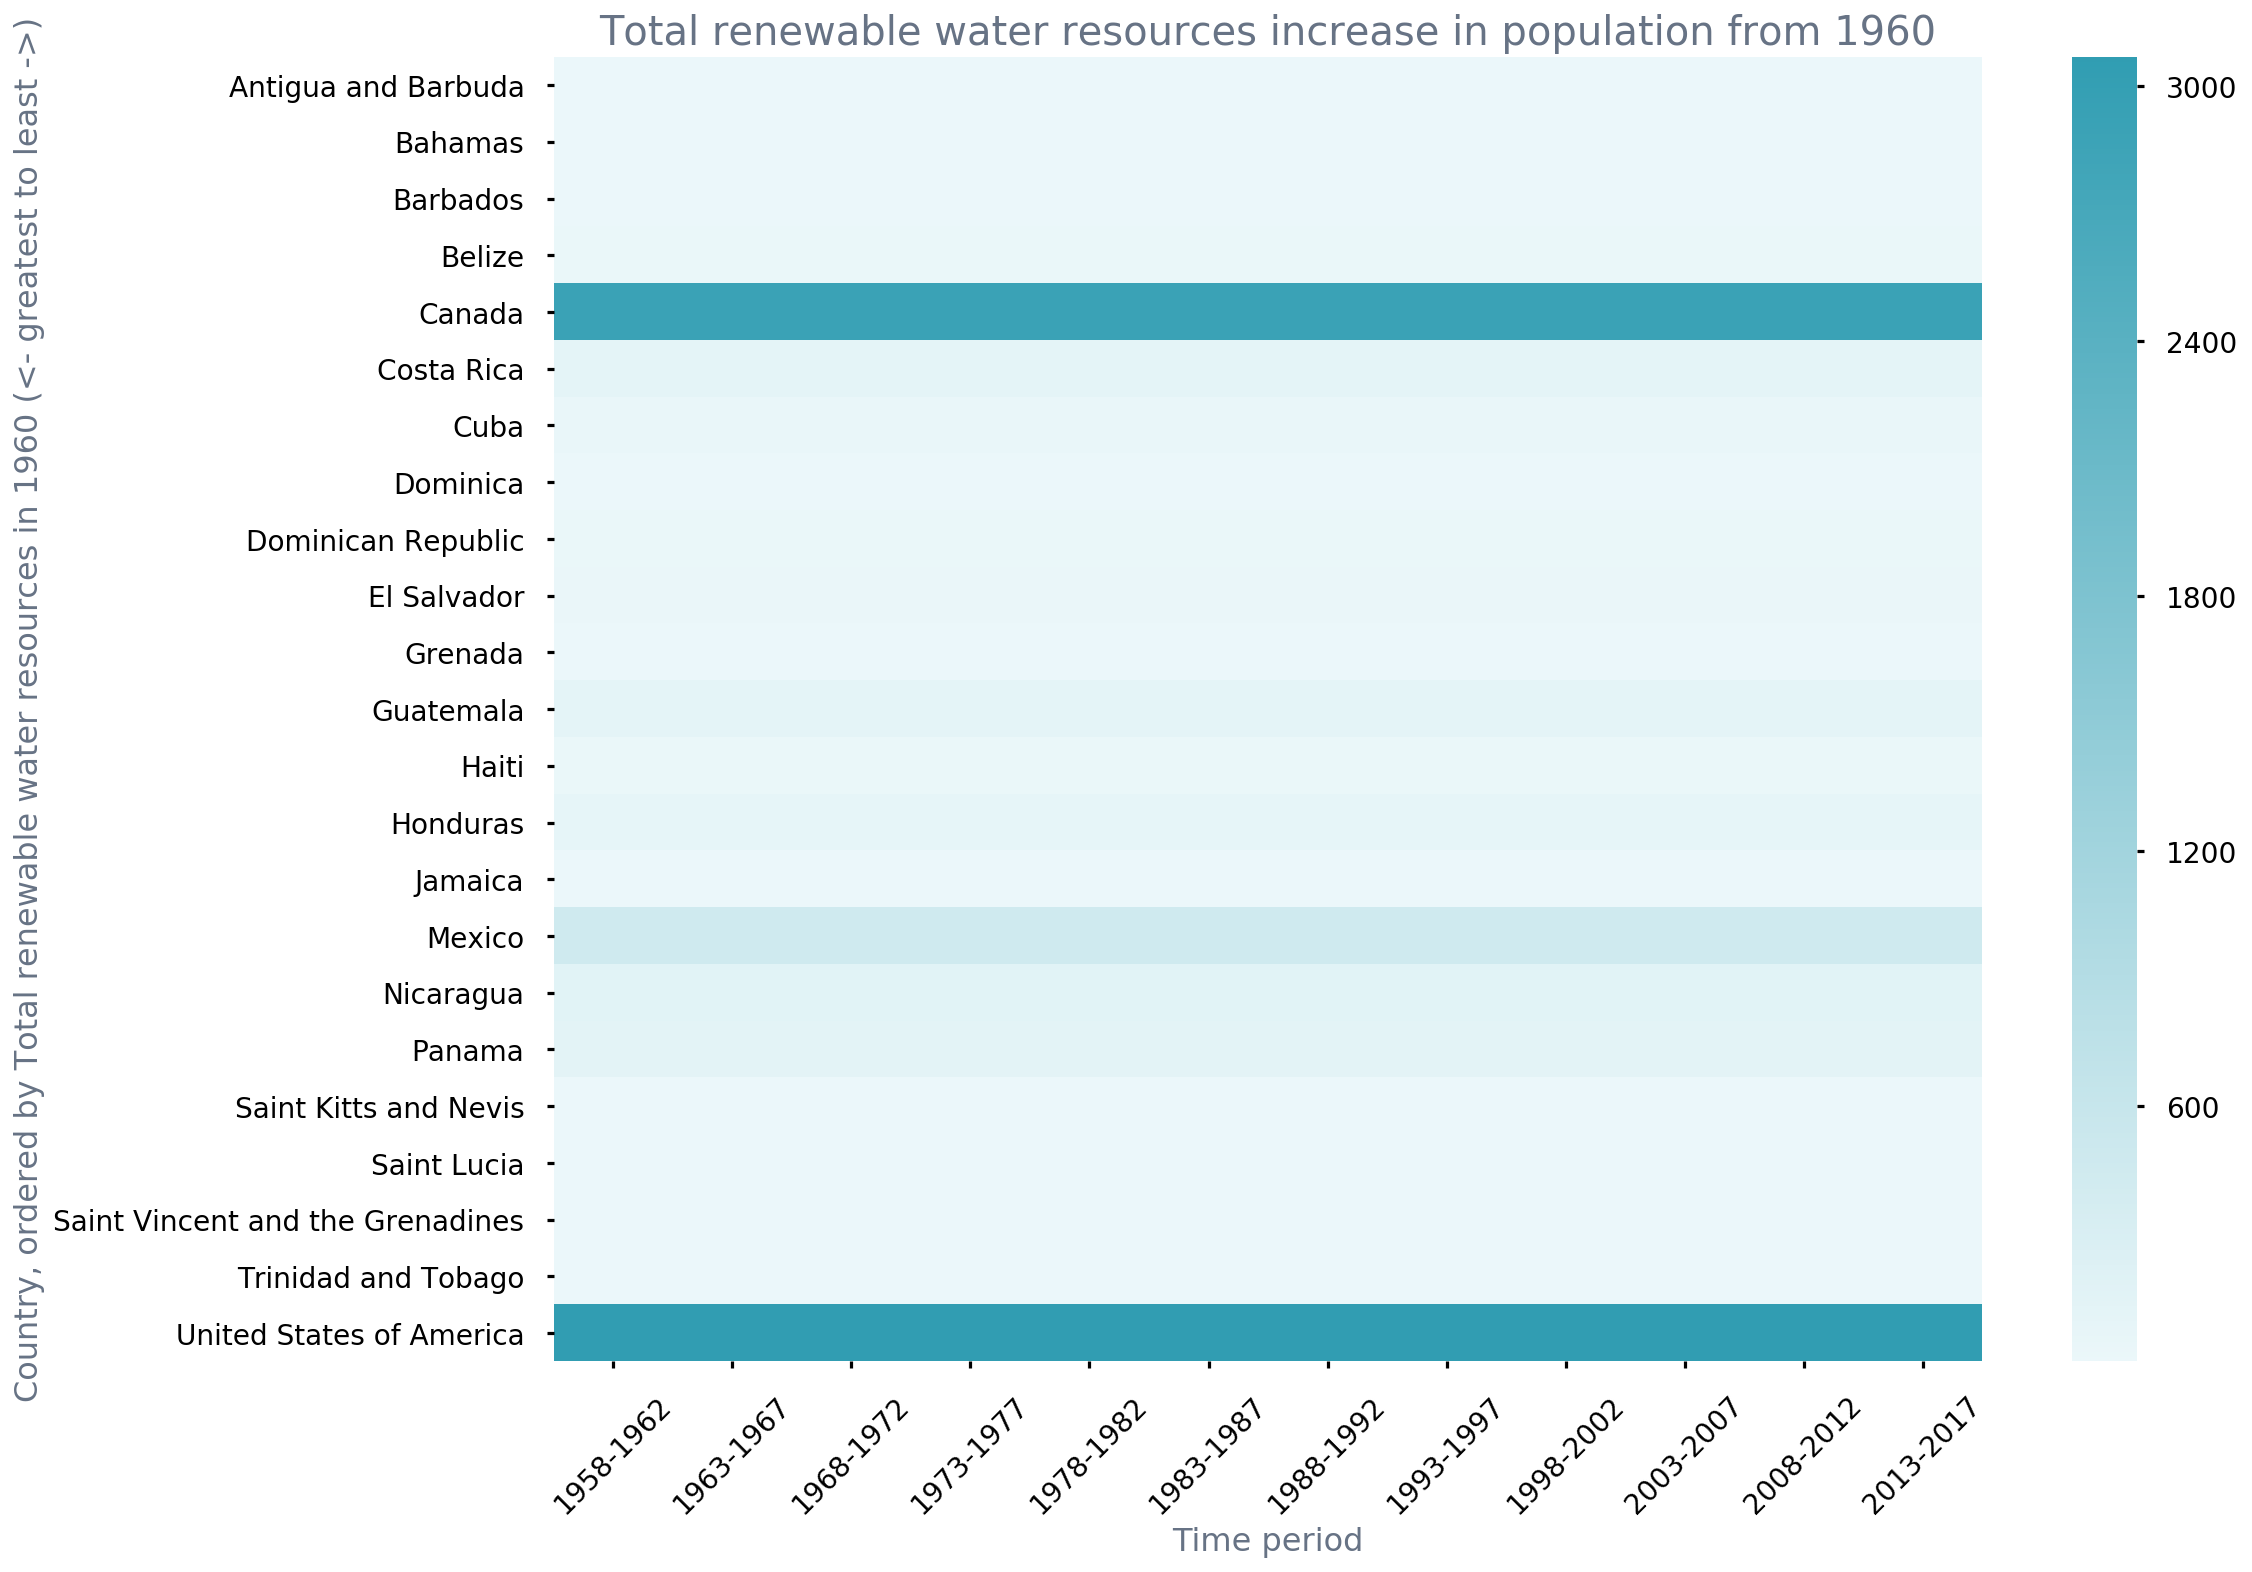

In [41]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(north_america_renew, ax=ax, cmap=sns.light_palette((214, 90, 60), input="husl", as_cmap=True))
plt.xticks(rotation=45)
plt.xlabel('Time period')
plt.ylabel('Country, ordered by Total renewable water resources in 1960 (<- greatest to least ->)')
plt.title('Total renewable water resources increase in population from 1960')


In [42]:
def two_hist(df, variable, bins=50,
             ylabel='Number of countries', title=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    ax1 = plot_hist(df, variable, bins=bins,
                    xlabel=variable, ylabel=ylabel,
                    ax=ax1, title=variable if not title else title)
    ax2 = plot_hist(df, variable, bins=bins,
                    xlabel='Log of ' + variable, ylabel=ylabel,
                    logx=True, ax=ax2,
                    title='Log of ' + variable if not title else title)
    plt.close()
    return fig


In [43]:
def hist_over_var(df, variables, bins=50,
                  ylabel='Number of countries', title=None):
    variable_slider = widgets.Dropdown(options=variables.tolist(),
                                       value=variables[0],
                                       description='Variable:',
                                       disabled=False,
                                       button_style='')
    widgets.interact(two_hist, df=widgets.fixed(df),
                     variable=variable_slider, ylabel=widgets.fixed(ylabel),
                     title=widgets.fixed(title), bins=widgets.fixed(bins))


<p>Failed to display Jupyter Widget of type <code>interactive</code>.</p>
<p>
  If you're reading this message in the Jupyter Notebook or JupyterLab Notebook, it may mean
  that the widgets JavaScript is still loading. If this message persists, it
  likely means that the widgets JavaScript library is either not installed or
  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter
  Widgets Documentation</a> for setup instructions.
</p>
<p>
  If you're reading this message in another frontend (for example, a static
  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),
  it may mean that your frontend doesn't currently support widgets.
</p>

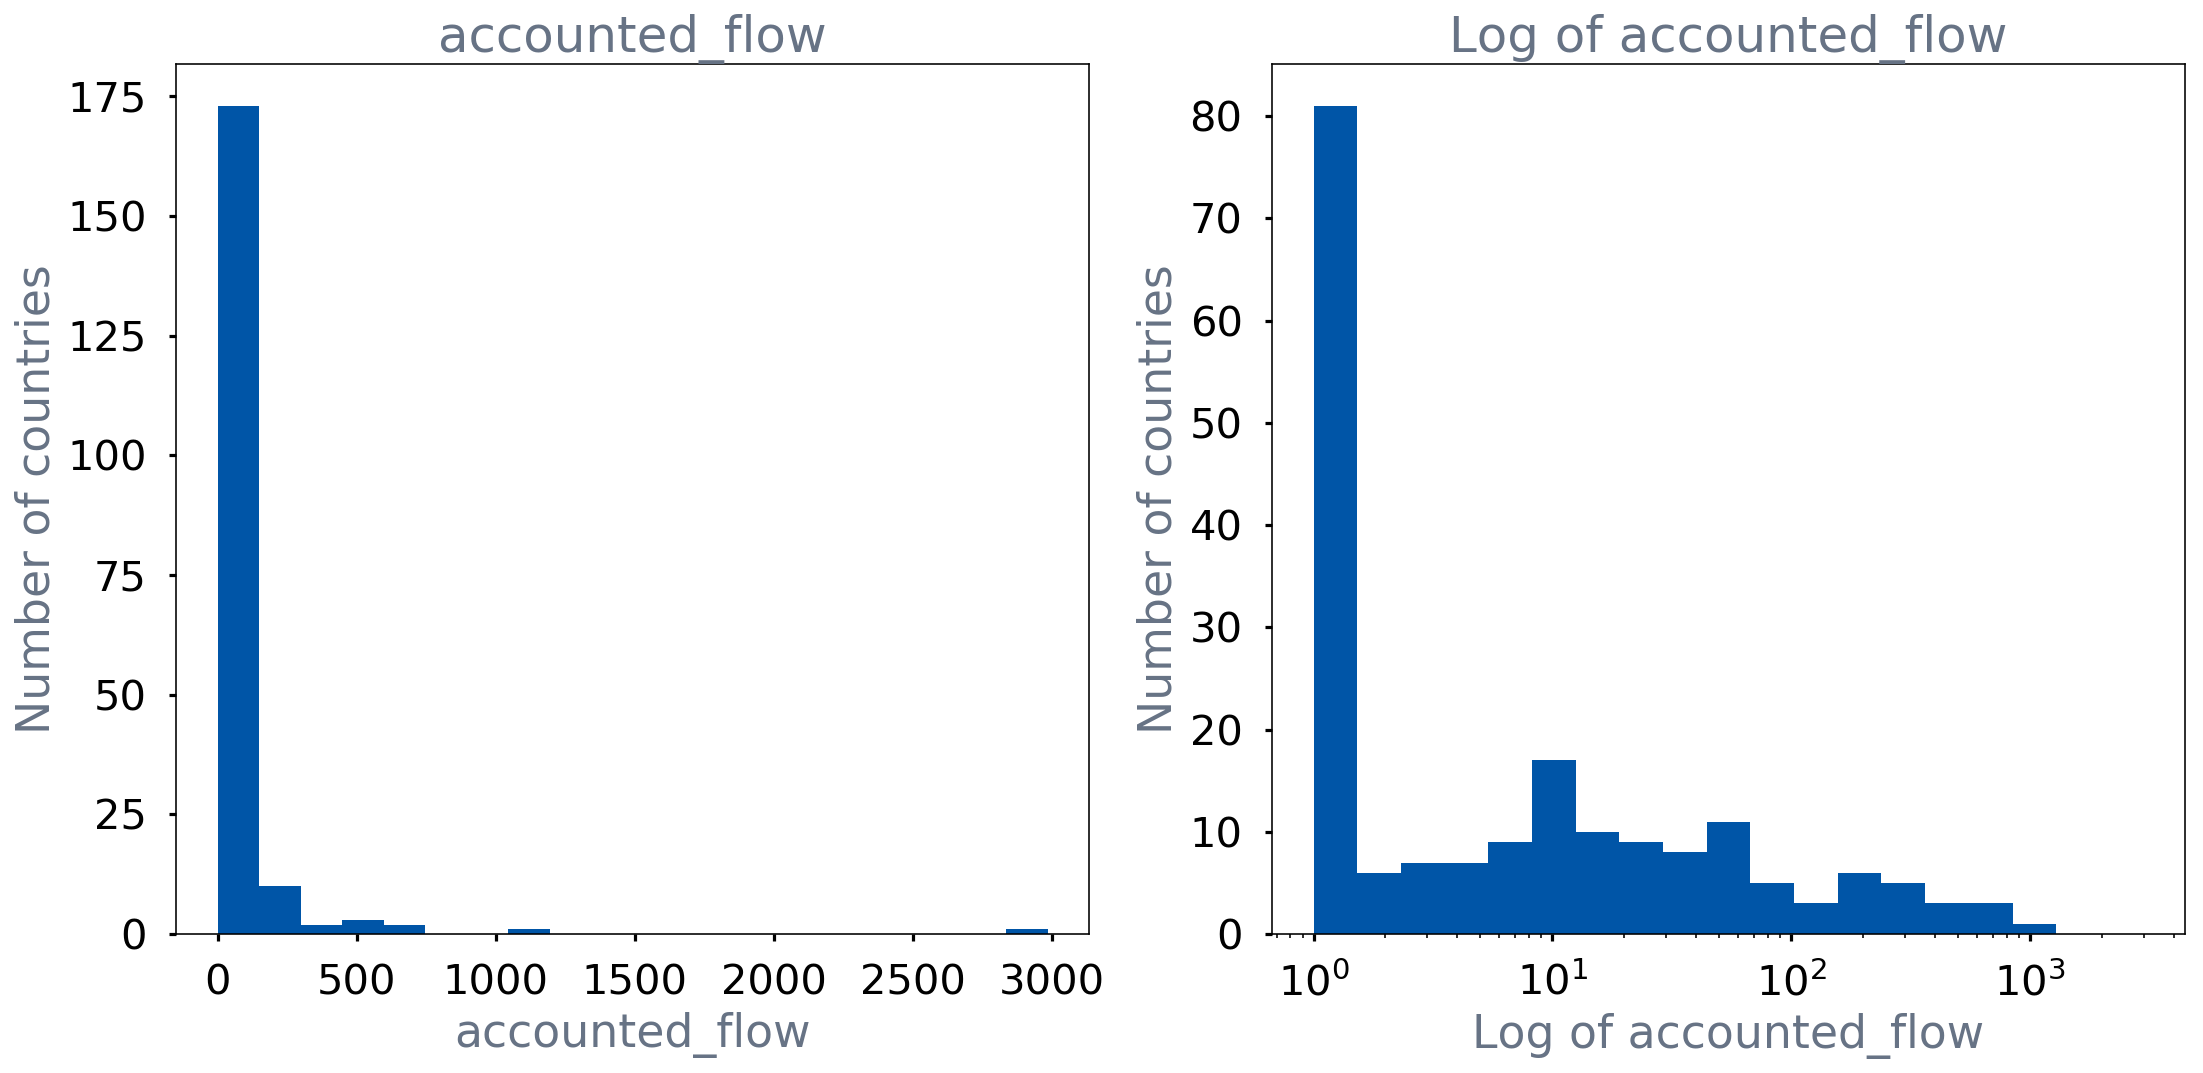

In [46]:
hist_over_var(recent, recent.columns, bins=20)
